**Patrick Mugisha,  "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scikitplot as skplt
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)

from scipy import stats         

# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix   

import warnings   
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 1) Business Understanding: The question (and step) is that you review the problem statement and the description about the columns (or variables) in the dataset, and develop three hypotheses1, which you can test using statistics (e.g., t-testing) and classification analysis on the dataset. Provide the rationale for the hypotheses. An example would be “there is no significant difference of satisfaction_level between those staying and those left”. In other words, satisfaction_level has no significant impact on turnover.

* Hypothesis 1: there is no significant difference in last_evaluation  between those staying and those who left.
* Hypothesis 2: there is no significant difference in time_spend_company between those staying and those who left.
* Hypothesis 3: promotion_last_5years has no significant impact on turnover.

## 2) Demonstrate your data cleaning & transformation skills. Any data quality issues?
a) Check any missing value. What did you do to handle missing values and other data quality issues?

b) What features (or variables) need to be transformed (e.g., categorical variables, encoding categorical variables, changing data types)?

In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

* There is no missing values

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
df=df.rename(columns={"average_montly_hours": "average_monthly_hours"})
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


* Work_accident needed to be written in lower case
* average_montly_hours needed to be corrected to average_monthly_hours

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* sales and salary need to transformed from categorical to numerical by creating dummy variables for them.

## 3) Demonstrate your data visualization skills (e.g., charts, pivot tables). You should explore matplot and seaborn (interactive plots are optional). The focus should be on identifying X variables (independent variables) affecting Y value (dependent variable, “left” in the dataset). What X variables appear to influence on “whether the employee left the workplace or not (1 or 0)”?

In [7]:
df = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_RandD            14999 non-null  uint8  
 9   sales_accounting       14999 non-null  uint8  
 10  sales_hr               14999 non-null  uint8  
 11  sales_management       14999 non-null  uint8  
 12  sales_marketing        14999 non-null  uint8  
 13  sales_product_mng      14999 non-null  uint8  
 14  sales_sales            14999 non-null  uint8  
 15  sa

In [9]:
# How likely is the employee to leave the workplace or not?

df['left'].value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

* On average, the employees are 76.19% likely to stay and 23.81% likely to leave.

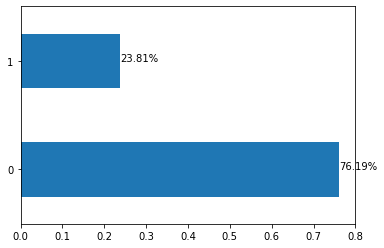

In [10]:
a = (df['left'].value_counts() / len(df))
ax = a.plot(kind='barh') 
[ax.text(v, i, '{:.2f}%'.format(100*v)) for i, v in enumerate(a)];

In [11]:
# pivot table with time_spend_company, average_montly_hours, number_project
grouped = df.groupby(['time_spend_company', 'salary_low', 'work_accident', 'satisfaction_level', 'left'])
grouped['left'].agg(['count', 'mean', 'max']).head()

count  \
time_spend_company salary_low work_accident satisfaction_level left          
2                  0          0             0.09               1         2   
                                            0.12               0         1   
                                            0.13               0         1   
                                            0.14               0         1   
                                                               1         1   

                                                                     mean  max  
time_spend_company salary_low work_accident satisfaction_level left             
2                  0          0             0.09               1        1    1  
                                            0.12               0        0    0  
                                            0.13               0        0    0  
                                            0.14               0        0    0  
                                                               1        1    1

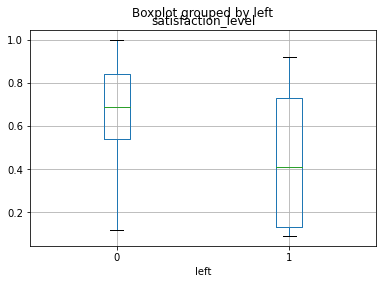

In [12]:
df.boxplot(column='satisfaction_level', by='left')
plt.show()

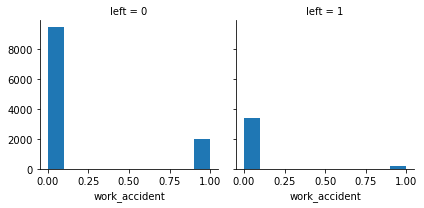

In [13]:
g=sns.FacetGrid(df, col='left')
g.map(plt.hist, 'work_accident')

left
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: time_spend_company, dtype: object

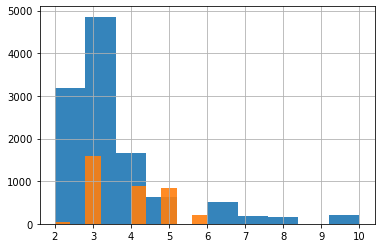

In [14]:
df.groupby('left').time_spend_company.hist(alpha=0.9)

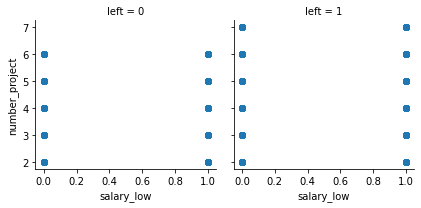

In [15]:
g = sns.FacetGrid(df, col="left")
g.map(plt.scatter, "salary_low", "number_project")

<AxesSubplot:xlabel='average_monthly_hours', ylabel='Density'>

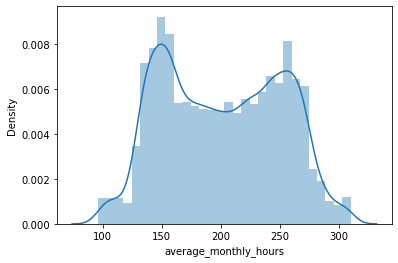

In [16]:
sns.distplot(df.average_monthly_hours)

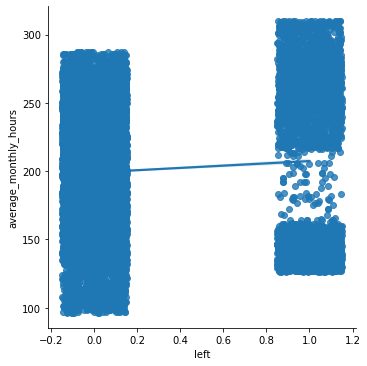

In [17]:
# linear regression & scatter chart for left and average_monthly_hours
sns.lmplot("left", "average_monthly_hours", df, x_jitter=.15)

<AxesSubplot:xlabel='work_accident', ylabel='left'>

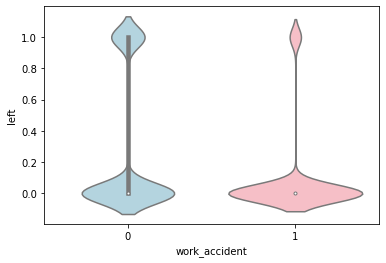

In [18]:
sns.violinplot("work_accident", "left", data=df,
               palette=["lightblue", "lightpink"])

## 4) Demonstrate your exploratory data analysis (EDA) and statistical hypothesis testing skills (e.g., correlation analysis, heatmap, hypothesis testing).
a) What X variables appear to influence on “whether the employee left the workplace or not (1 or 0)”?

b) What X variables are highly correlated to each other?

c) The dataset contains two groups of employees (those left from and those remaining with their organizations). Earlier, you developed three hypotheses. Perform hypothesis testing here. Assume the data is normally distributed and perform t-testing.

In [19]:
# basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
corr=pd.DataFrame(df.corr()['left'].drop('left'))
corr.sort_values(['left'], ascending=False)

,left
time_spend_company,0.144822
salary_low,0.134722
average_monthly_hours,0.071287
sales_hr,0.028249
number_project,0.023787
sales_technical,0.020076
sales_accounting,0.015201
sales_support,0.010700
sales_sales,0.009923
last_evaluation,0.006567


<AxesSubplot:>

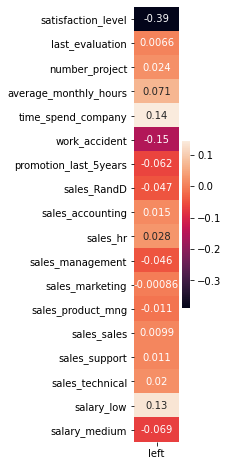

In [21]:
plt.figure(figsize=(1,8))
sns.heatmap(corr, annot=True)

* time_spend_company, salary_low, Work_accident, and satisfaction_level are the X variables that appear to influence “whether the employee left the workplace or not”

In [22]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.002504,0.007377
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,-0.040110,0.018299
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.082832,0.040985
sales_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.011887,0.020402
sales_accounting,-0.028649,0.002193,0.004189,0.000524,0.003909,-0.012836,0.015201,-0.004852,-0.054629,1.000000,-0.052848,-0.048610,-0.057183,-0.058723,-0.143341,-0.096989,-0.109262,-0.009759,0.003285


* X variables highly correlated to each other:
> * satisfaction_level and time_spend_company, number_project, last_evaluation
> * last_evaluation and number_project, average_monthly_hours, time_spend_company
> * number_project and average_monthly_hours, time_spend_company
> * average_monthly_hours and time_spend_company
> * time_spend_company and average_monthly_hours, number_project

#### Hypothesis testing

In [23]:
na=df[df['left']==0]['last_evaluation']
ya=df[df['left']==1]['last_evaluation']
stats.ttest_ind(na,ya)

Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)

In [24]:
na1=df[df['left']==0]['time_spend_company']
ya1=df[df['left']==1]['time_spend_company']
stats.ttest_ind(na1,ya1)

Ttest_indResult(statistic=-17.924210234916142, pvalue=4.207680457692835e-71)

In [25]:
na2=df[df['left']==0]['promotion_last_5years']
ya2=df[df['left']==1]['promotion_last_5years']
stats.ttest_ind(na2,ya2)

Ttest_indResult(statistic=7.581195349367637, pvalue=3.624047224146943e-14)

## 5) Demonstrate your skills in building, validating and evaluating classification models. You need to use the following machine learning algorithms and report the model performance:
a) Decision tree

b) Knn

c) Logistic regression

d) Random Forest Classifier

#### a) Decision Tree

In [26]:
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   sales_RandD  sales_accounting  sales_hr  sales_management  sales_marketing  \
0            0   

In [27]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_RandD            14999 non-null  uint8  
 9   sales_accounting       14999 non-null  uint8  
 10  sales_hr               14999 non-null  uint8  
 11  sales_management       14999 non-null  uint8  
 12  sales_marketing        14999 non-null  uint8  
 13  sales_product_mng      14999 non-null  uint8  
 14  sales_sales            14999 non-null  uint8  
 15  sa

In [29]:
# declare X variables and y variable

y = df['left']
X = df.drop(['left'], axis=1)

In [30]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
#Model evaluation

print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.978
--------------------------------------------------------
[[3390   72]
 [  27 1011]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.93      0.97      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.96      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500

--------------------------------------------------------
0.9765956061349815


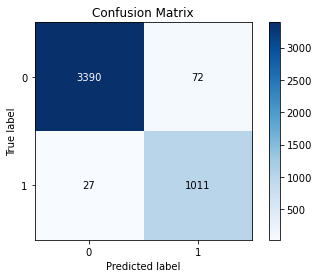

In [32]:
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

* The decision tree model is 97.7% accurate. Therefore, we expect that the model will be about 98% accurate when the model is applied into a real-world situation

In [33]:
text_representation = tree.export_text(dt, feature_names=(list(X.columns)))
print(text_representation)

|--- satisfaction_level <= 0.47
|   |--- number_project <= 2.50
|   |   |--- last_evaluation <= 0.57
|   |   |   |--- last_evaluation <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- last_evaluation >  0.44
|   |   |   |   |--- average_monthly_hours <= 162.00
|   |   |   |   |   |--- average_monthly_hours <= 125.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- average_monthly_hours >  125.50
|   |   |   |   |   |   |--- satisfaction_level <= 0.34
|   |   |   |   |   |   |   |--- average_monthly_hours <= 140.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- average_monthly_hours >  140.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- satisfaction_level >  0.34
|   |   |   |   |   |   |   |--- last_evaluation <= 0.56
|   |   |   |   |   |   |   |   |--- average_monthly_hours <= 150.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- average_monthly_hours >  150.50
|  

In [34]:
# save text representation 
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

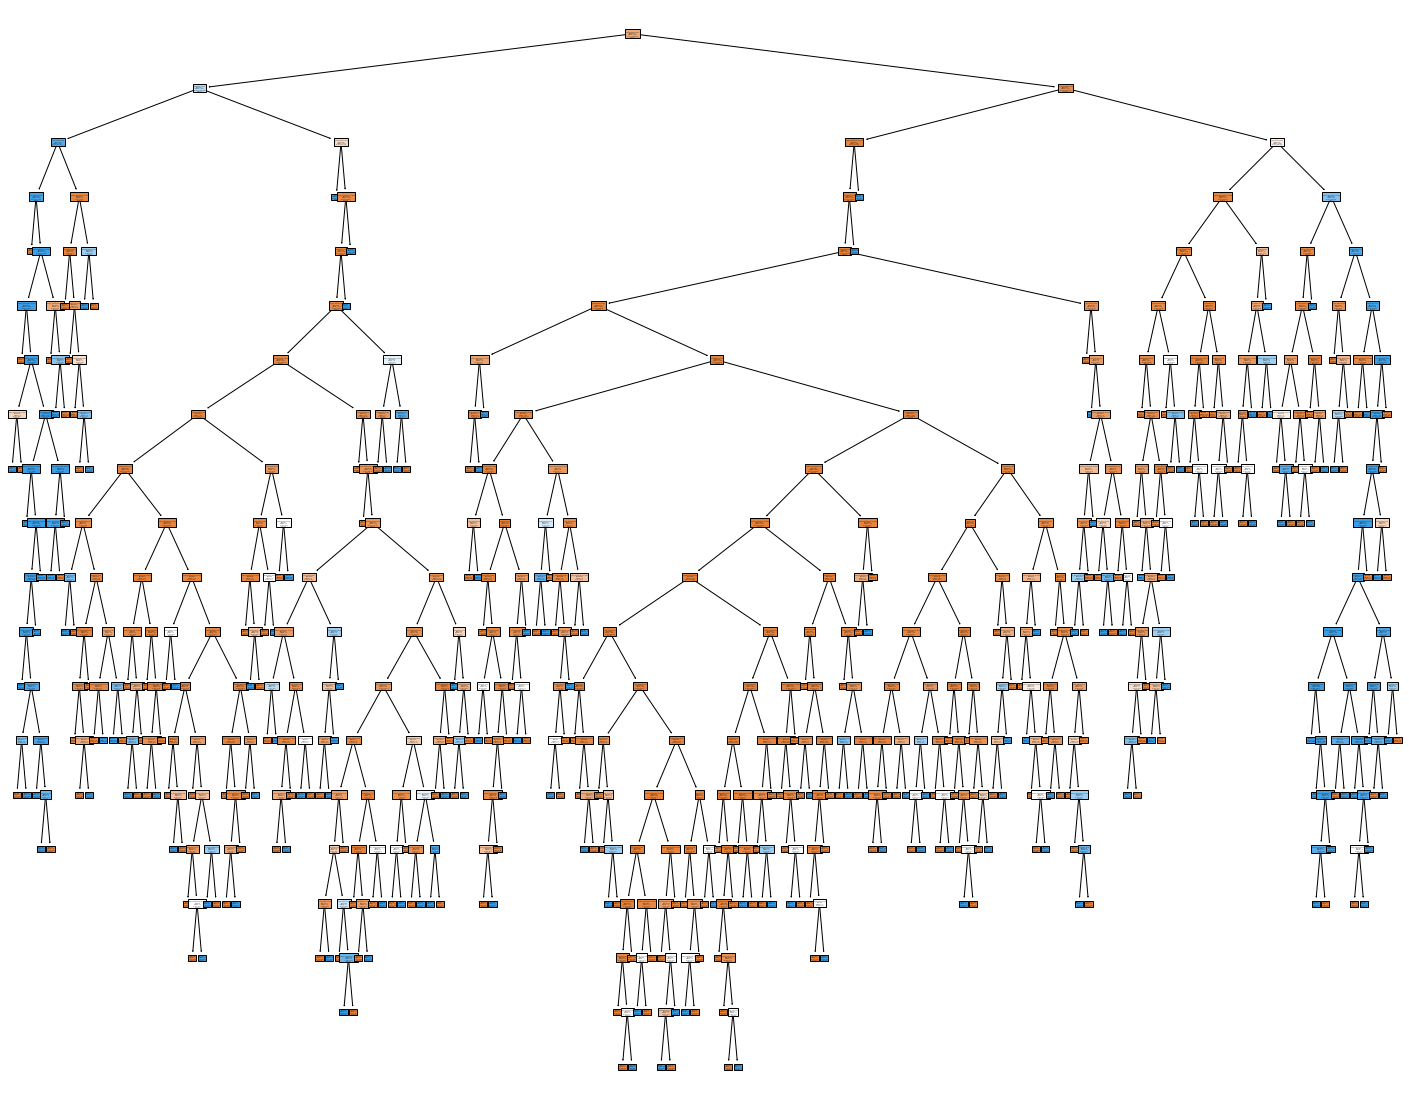

In [35]:
# tree plot
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt, 
                feature_names = X.columns, 
                class_names=['0','1'],   
                filled = True);

In [36]:
fig.savefig("decistion_tree.png")

#### Simple decision tree

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt_simple.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [38]:
print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt_simple.predict(X_test)))

0.9533333333333334
--------------------------------------------------------
[[3332  130]
 [  80  958]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3462
           1       0.88      0.92      0.90      1038

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500

--------------------------------------------------------
0.9426890801200816


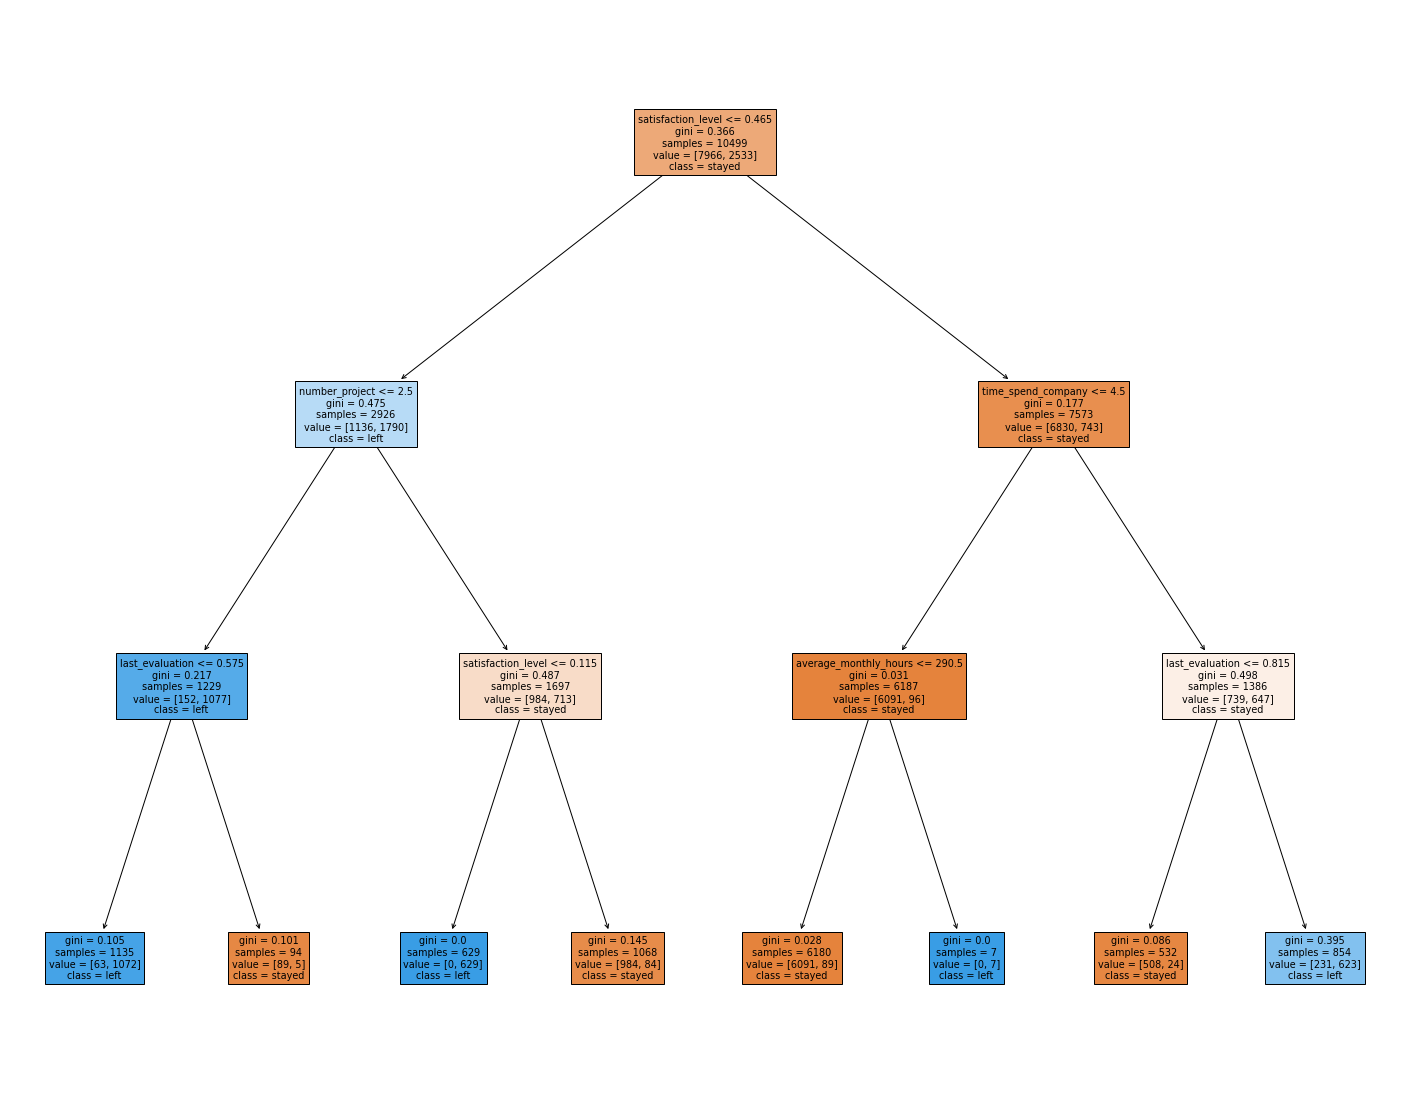

In [39]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_simple, 
                feature_names = X.columns, 
                class_names=['stayed','left'],    
                filled = True);

#### b) Knn

In [40]:
# evaluate the model by splitting into train and test sets & develop knn model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
#Model evaluation

print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, knn.predict(X_test)))

0.9373333333333334
--------------------------------------------------------
[[3264  198]
 [  84  954]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3462
           1       0.83      0.92      0.87      1038

    accuracy                           0.94      4500
   macro avg       0.90      0.93      0.91      4500
weighted avg       0.94      0.94      0.94      4500

--------------------------------------------------------
0.930941385079292


> #### Appendix 2: Search for the optimal k value (GridSearch)

In [42]:
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [43]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_score_)
print(knn_gs.best_params_)
print(knn_gs.best_estimator_)

0.9476142834456317
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


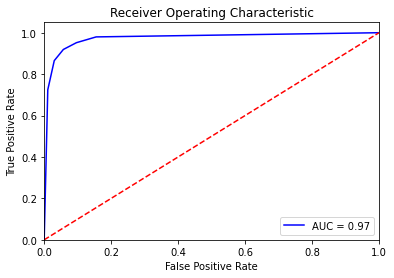

In [44]:
preds = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### c) Logistic regression

In [45]:
# correlation analysis
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.002504,0.007377
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,-0.040110,0.018299
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.082832,0.040985
sales_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.011887,0.020402
sales_accounting,-0.028649,0.002193,0.004189,0.000524,0.003909,-0.012836,0.015201,-0.004852,-0.054629,1.000000,-0.052848,-0.048610,-0.057183,-0.058723,-0.143341,-0.096989,-0.109262,-0.009759,0.003285


In [46]:
# evaluate the model by splitting into train and test sets and build a logistic regression model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [47]:
# print coefficients
coef = pd.DataFrame(list(zip(X.columns, np.transpose(lr.coef_))), 
             columns=['X variables', 'coef']).sort_values('coef', ascending=False)

coef['coef'] = coef['coef'].str[0]
coef

,X variables,coef
16,salary_low,1.892610
17,salary_medium,1.355046
1,last_evaluation,0.587227
9,sales_hr,0.405814
4,time_spend_company,0.279874
14,sales_support,0.243578
15,sales_technical,0.237754
13,sales_sales,0.151597
8,sales_accounting,0.142256
11,sales_marketing,0.051443


In [48]:
#Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.7911111111111111
[[3203  259]
 [ 681  357]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3462
           1       0.58      0.34      0.43      1038

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.77      0.79      0.77      4500

0.6345591942911145


* 79.1% model accuracy

In [49]:
# generate class probabilities
probs = lr.predict_proba(X_test)
print(probs)
#1st column: probability of NOT leaving workplace
#2nd column: probabiility of leaving workplace

[[0.70575353 0.29424647]
 [0.75867    0.24133   ]
 [0.95440033 0.04559967]
 ...
 [0.9012368  0.0987632 ]
 [0.86162077 0.13837923]
 [0.27742192 0.72257808]]


* 1st employee: 29% chance of leaving
* 2nd employee: 24% chance of leaving

> #### Appendix 2: Model Evaluation with ROC 

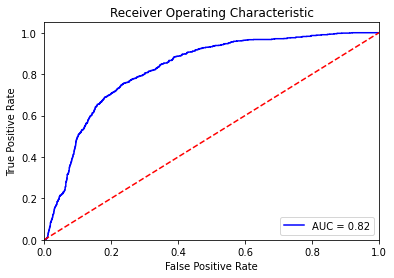

In [50]:
preds = lr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### d) Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)  
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9871111111111112

In [52]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9871111111111112
[[3446   16]
 [  42  996]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.98      0.96      0.97      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



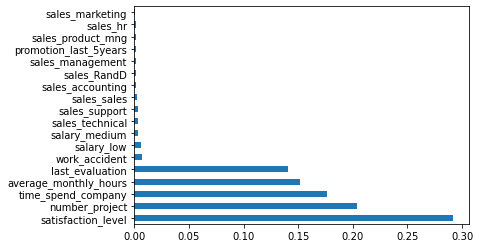

In [53]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

* satisfaction_level, time_spend_company, and number_project seems to be three most important predictors using Random Forest Classifier.

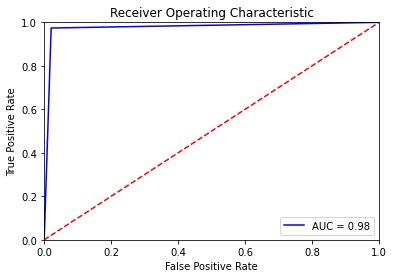

In [54]:
# calculate the fpr and tpr for all thresholds of the classification

preds = dt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
print("False-positive rate:", fpr)
print("True-positive rate: ", tpr)
print("AUC score: ", metrics.roc_auc_score(y_test, dt.predict(X_test)))

False-positive rate: [0.         0.02079723 1.        ]
True-positive rate:  [0.         0.97398844 1.        ]
AUC score:  0.9765956061349815


> - **ROC chart shows that 2% FPR & 97.1% TPR**
> - **And, AUC is 0.97**

## 6) Demonstrate your understanding of feature selection in classification analysis. Now, you need to build classification models using feature selection. The goal is to find the best classification model with the highest accuracy and interpretability. According to different feature selection techniques, what variables are considered important in predicting employee turnover?

In [56]:
# declare X variables and y variable

y = df['left']
X = df.drop(['left'], axis=1)

print(X.shape, y.shape)

(14999, 18) (14999,)


> ## 1. SelectKBest 

In [57]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print(X_new)

[[3.80e-01 1.57e+02 0.00e+00]
 [8.00e-01 2.62e+02 0.00e+00]
 [1.10e-01 2.72e+02 0.00e+00]
 ...
 [3.70e-01 1.43e+02 0.00e+00]
 [1.10e-01 2.80e+02 0.00e+00]
 [3.70e-01 1.58e+02 0.00e+00]]


In [58]:
# this will help you identify the column indexes (and names)
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 3 5]


In [59]:
X.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0


#### variables considered important in predicting employee turnover using SelectKBest
> * satisfaction_level, average_monthly_hours, Work_accident

In [60]:
# decision tree model with the three features ... Split validation:train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0) 

# Initialize decisiontreeclassifier()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.9215555555555556
--------------------------------------------------------
[[3286  176]
 [ 177  861]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3462
           1       0.83      0.83      0.83      1038

    accuracy                           0.92      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.92      0.92      0.92      4500

--------------------------------------------------------
0.8893210513485806


In [61]:
X_new_df = pd.DataFrame(X_new)
X_new_df = X_new_df.rename(columns={0: 'satisfaction_level', 3: 'average_montly_hours', 5: 'Work_accident_1'})

text_representation = tree.export_text(dt, feature_names=(list(X_new_df.columns)))
print(text_representation)

|--- satisfaction_level <= 0.47
|   |--- satisfaction_level <= 0.11
|   |   |--- class: 1
|   |--- satisfaction_level >  0.11
|   |   |--- satisfaction_level <= 0.36
|   |   |   |--- 1 <= 289.00
|   |   |   |   |--- satisfaction_level <= 0.31
|   |   |   |   |   |--- 1 <= 276.50
|   |   |   |   |   |   |--- 1 <= 257.50
|   |   |   |   |   |   |   |--- 1 <= 256.50
|   |   |   |   |   |   |   |   |--- satisfaction_level <= 0.15
|   |   |   |   |   |   |   |   |   |--- 1 <= 159.00
|   |   |   |   |   |   |   |   |   |   |--- 1 <= 157.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- 1 >  157.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- 1 >  159.00
|   |   |   |   |   |   |   |   |   |   |--- satisfaction_level <= 0.13
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- satisfaction_level >  0.13
|   |   |   |

In [62]:
# develop logistic regression model with X_new (only three predictors or independent variables)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, lr.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.7744444444444445
--------------------------------------------------------
[[3220  242]
 [ 773  265]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      3462
           1       0.52      0.26      0.34      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500

--------------------------------------------------------
0.5926984301900401


> ## 2. Recursive Feature Selection (RFE)

In [63]:
model = LogisticRegression()
rfe = RFE(model, 5)  #asking five best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

[ True False False False False  True  True False False False False False
 False False False False  True  True]
[ 1  6  7 14  5  1  1  2 10  4  3 11 13 12  9  8  1  1]


In [64]:
X.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [65]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,satisfaction_level,1
1,last_evaluation,6
2,number_project,7
3,average_monthly_hours,14
4,time_spend_company,5
5,work_accident,1
6,promotion_last_5years,1
7,sales_RandD,2
8,sales_accounting,10
9,sales_hr,4


#### what variables are considered important in predicting employee turnover?
> * satisfaction_level, Work_accident, promotion_last_5years, salary_low, salary_medium

In [66]:
# another method
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: x, rfe.ranking_), X.columns)))

Features sorted by their rank:
[(1, 'promotion_last_5years'), (1, 'salary_low'), (1, 'salary_medium'), (1, 'satisfaction_level'), (1, 'work_accident'), (2, 'sales_RandD'), (3, 'sales_management'), (4, 'sales_hr'), (5, 'time_spend_company'), (6, 'last_evaluation'), (7, 'number_project'), (8, 'sales_technical'), (9, 'sales_support'), (10, 'sales_accounting'), (11, 'sales_marketing'), (12, 'sales_sales'), (13, 'sales_product_mng'), (14, 'average_monthly_hours')]


In [67]:
#here I select 4 most significant features only 
X_logistic = df[['work_accident', 'promotion_last_5years', 'salary_low', 'salary_medium', 'satisfaction_level']]
print(X_logistic.head())

   work_accident  promotion_last_5years  salary_low  salary_medium  \
0              0                      0           1              0   
1              0                      0           0              1   
2              0                      0           0              1   
3              0                      0           1              0   
4              0                      0           1              0   

   satisfaction_level  
0                0.38  
1                0.80  
2                0.11  
3                0.72  
4                0.37  


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.7886666666666666
[[3235  227]
 [ 724  314]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3462
           1       0.58      0.30      0.40      1038

    accuracy                           0.79      4500
   macro avg       0.70      0.62      0.63      4500
weighted avg       0.76      0.79      0.76      4500

0.618467890857969


In [69]:
import statsmodels.api as sm
logit_model=sm.Logit(y, X_logistic)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.446921
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14994
Method:                           MLE   Df Model:                            4
Date:                Sat, 03 Apr 2021   Pseudo R-squ.:                  0.1857
Time:                        02:52:05   Log-Likelihood:                -6703.4
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
work_accident            -1.4835      0.087    -16.990      0.000      -1.655      -1.

In [70]:
result.pred_table()

array([[10669.,   759.],
       [ 2494.,  1077.]])

> # 3. Feature Importance

In [71]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print(model_extra.score(X, y))

# display the relative importance of each attribute
print((model_extra.feature_importances_))

1.0
[0.22786306 0.13116114 0.24784955 0.1447667  0.17566613 0.01711666
 0.00303213 0.00313154 0.00321245 0.00321908 0.00268254 0.00237
 0.00274439 0.00519138 0.0048847  0.00518683 0.01388177 0.00603996]


In [72]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0024, 'sales_marketing'), (0.0027, 'sales_management'), (0.0027, 'sales_product_mng'), (0.003, 'promotion_last_5years'), (0.0031, 'sales_RandD'), (0.0032, 'sales_accounting'), (0.0032, 'sales_hr'), (0.0049, 'sales_support'), (0.0052, 'sales_sales'), (0.0052, 'sales_technical'), (0.006, 'salary_medium'), (0.0139, 'salary_low'), (0.0171, 'work_accident'), (0.1312, 'last_evaluation'), (0.1448, 'average_monthly_hours'), (0.1757, 'time_spend_company'), (0.2279, 'satisfaction_level'), (0.2478, 'number_project')]


In [73]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
number_project,0.247850
satisfaction_level,0.227863
time_spend_company,0.175666
average_monthly_hours,0.144767
last_evaluation,0.131161
work_accident,0.017117
salary_low,0.013882
salary_medium,0.006040
sales_sales,0.005191
sales_technical,0.005187


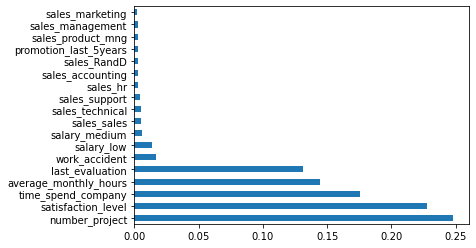

In [74]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

**Some variables are considered important in predicting employee turnover**
> * number_project, satisfation_level, time_spend_company, average_mothly_hours, last_evaluation 

## 7) Demonstrate your skills in model selection. At this stage, you have chosen the best classification model for predicting employee turnover.
a) What is your best model? Explain the model.

b) How good is your model?

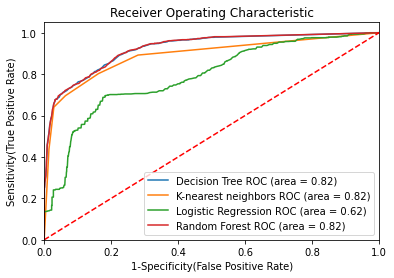

In [75]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-nearest neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=500),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

* The Random Forest classifier is the best classification model for predicting employee turnover 

* The model is 98.95% accurate, has AUC = 0.97 and ROC = 0.82

## 8) Demonstrate your aptitude to learn new things using available resources. So far, you have used such algorithms as decision tree, knn, and logistic regression as supervised machine learning algorithms for classification problems. In fact, there are several other classification algorithms (e.g., Gradient Boost Classifier, Support Vector Machine). Now, build a classification model with one of these classifiers. The notebook (3_Classification_AdvancedAlgorithms.ipynb) contains examples of applying these advanced algorithms to the 2nd heart attack dataset.

#### GradientBoostingClassifier

In [76]:
# advanced algorthms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [77]:
y = df['left']
X = df.drop(['left'], axis=1)

In [78]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize 
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)

# fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [79]:
#Model evaluation

print(metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, gb.predict(X_test)))

0.9771111111111112
--------------------------------------------------------
[[3430   32]
 [  71  967]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3462
           1       0.97      0.93      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500

--------------------------------------------------------
0.9611780086354574


In [80]:
# 10-fold cross-validation
scores = cross_val_score(gb, X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.97933333 0.97466667 0.97333333 0.97333333 0.97266667 0.97666667
 0.97733333 0.974      0.978      0.97731821]
0.9756651545474762


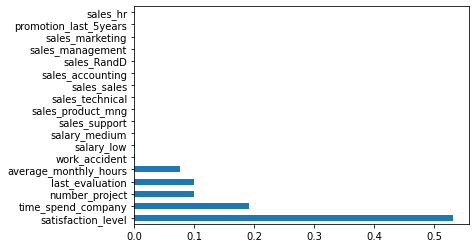

In [81]:
pd.DataFrame(gb.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

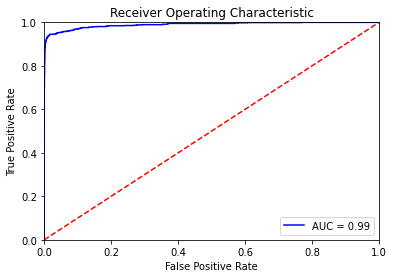

In [82]:
# calculate the fpr and tpr for all thresholds of the classification

preds = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 9) Demonstrate your storytelling skills.
a) What are the results of testing your hypotheses?

b) Discuss your classification model(s) for companies and HR managers. What variables are important in predicting employee turnover? And How important are they? What are the characteristics of the employees who are likely to leave?

#### a) What are the results of testing your hypotheses?

* There is no significant difference between people who stay and those who leave in terms of last_evaluation
* There is statisticaly signifcant difference in time_spend_company between employee turnover
* There is significant difference in employee turnover in terms of promotion_last_5years

#### b) Discuss your classification model(s) for companies and HR managers. What variables are important in predicting employee turnover? And How important are they? What are the characteristics of the employees who are likely to leave?

##### Discuss your classification model(s) for companies and HR managers.

* The Decision tree selects which X variables are important and provides the decision rules eg: an employee with satisfaction_level less than 0.47, number_project less than 2.50, last_evaluation less than 0.57, then the likely outcome is that they will stay at the workplace. It has a 97.66% prediction accuracy.

* The KNN model algorithm searches feature space for k number of data that are closest to the training data. if data points are in k space and close together but they from different groups then the algorithm classifies the minority data points and makes them look like the majority. It has a 93.73% prediction accuracy.

* The Logistic regression is for classification when the y variable(left) is categorical and it generate class probabilities for every employee on how likely they are to leave or stay at a workplace. It has a 79.11% prediction accuracy.

* The Random Forest Classifier runned 20 different decision trees to improve model accuracy and comes out with the best one to use. the most important variablesto predict employee turn over were;satisfaction_level, time_spend_company, average_monthly_hours, number_project, last_evaluation. It has a 98.95% prediction accuracy. 

##### variables that are important in predicting employee turnover?

* X variables that are important in predicting employee turnover are produced by the best predicting model(Random Forest classifier) and those are: **satisfaction_level, time_spend_company, average_monthly_hours, number_project, last_evaluation**

In [83]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
left,,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021,0.450123,0.448810
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183,0.608233,0.368804


#####  The characteristics of the employees who are likely to leave

* Employees who are likely to leave have lower satisfaction level
* Employees who are likely to leave spend more Average monthly hours at workplace
* Employees who are likely to leave have less workplace accident
* Employees who are likely to leave on average received less promotions in the last five years